# Task 5: Decision Trees and Random Forests using Pima Indians Diabetes Dataset

### 📌 Objective: Learn tree-based models for classification & regression
### 🧰 Tools: Scikit-learn, Graphviz

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
column_names = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
df = pd.read_csv(url, names=column_names)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

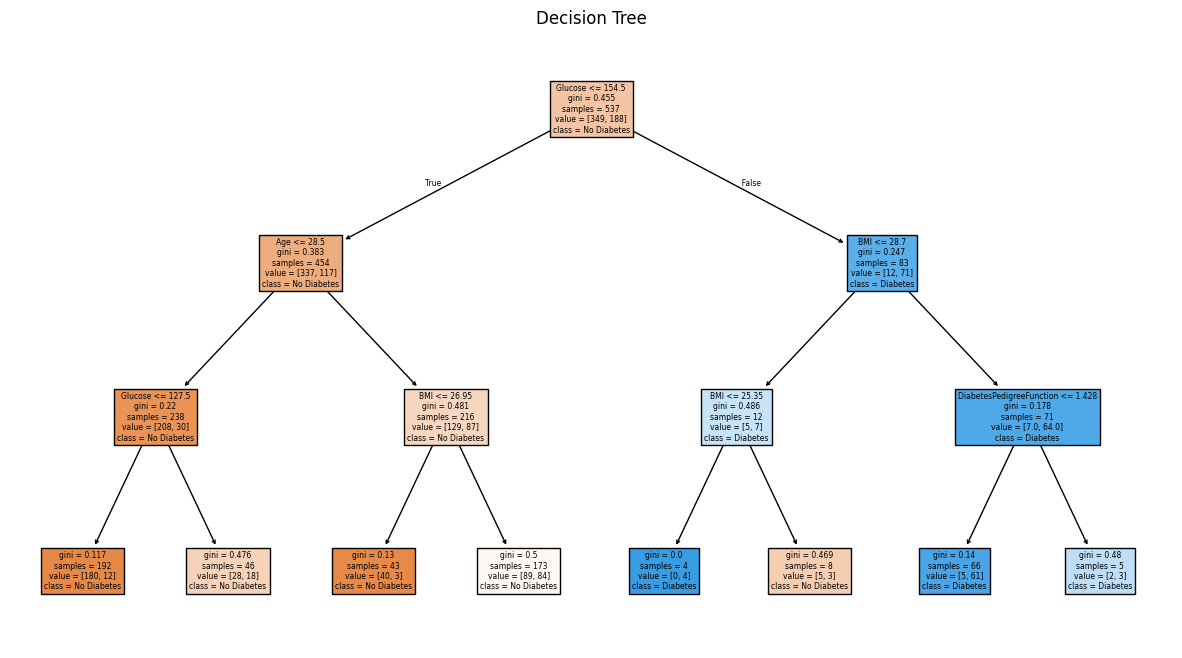

In [ ]:

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(X_train, y_train)


plt.figure(figsize=(15, 8))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"])
plt.title("Decision Tree")
plt.show()

In [ ]:

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.7186147186147186
              precision    recall  f1-score   support

           0       0.72      0.93      0.81       151
           1       0.71      0.31      0.43        80

    accuracy                           0.72       231
   macro avg       0.72      0.62      0.62       231
weighted avg       0.72      0.72      0.68       231



In [ ]:

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7532

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       151
           1       0.64      0.66      0.65        80

    accuracy                           0.75       231
   macro avg       0.73      0.73      0.73       231
weighted avg       0.76      0.75      0.75       231



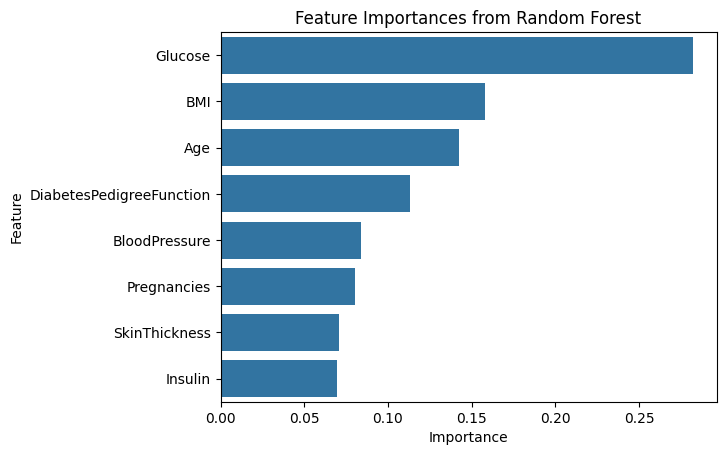

In [ ]:

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importances from Random Forest")
plt.show()

In [ ]:

dt_scores = cross_val_score(dt, X, y, cv=5)
rf_scores = cross_val_score(rf, X, y, cv=5)

print("Decision Tree CV Accuracy: {:.2f} ± {:.2f}".format(dt_scores.mean(), dt_scores.std()))
print("Random Forest CV Accuracy: {:.2f} ± {:.2f}".format(rf_scores.mean(), rf_scores.std()))

Decision Tree CV Accuracy: 0.73 ± 0.01
Random Forest CV Accuracy: 0.77 ± 0.04
